# BLU02 - Learning Notebook - Data wrangling workflows - Part 2 of 3

In [2]:
import matplotlib.pyplot as plt

import pandas as pd
import os

# 2 Combining dataframes in Pandas

## 2.1 How many programs are there per season?

How many different programs does the NYP typically present per season?

Programs are under `/data/programs/` which contains a file per Season.

### Concatenate

To analyze how many programs there are per season, over time, we need a single dataframe containing *all* seasons.

Concatenation means, in short, to unite multiple dataframes (or series) in one. 

The `pd.concat()` function performs concatenation operations along an axis (`axis=0` for index and `axis=1` for columns).

In [3]:
season_0 = pd.read_csv('./data/programs/1842-43.csv')
season_1 = pd.read_csv('./data/programs/1843-44.csv')

In [4]:
season_0

,GUID,ProgramID,Orchestra,Season
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,New York Philharmonic,1842-43
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,New York Philharmonic,1842-43
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,Musicians from the New York Philharmonic,1842-43
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,New York Philharmonic,1842-43


In [5]:
season_1

,GUID,ProgramID,Orchestra,Season
0,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,New York Philharmonic,1843-44
1,47b6e9e8-3b18-49ea-ae2a-b9b0ca18902c,3368,New York Philharmonic,1843-44
2,5e533e4f-d4ac-4aaa-b8d2-e189f6806655,4226,New York Philharmonic,1843-44
3,7550f75e-5c0c-4519-9196-05a6c4e2612c,5087,New York Philharmonic,1843-44


In [6]:
seasons = [season_0, season_1]
pd.concat(seasons, axis=1)

,GUID,ProgramID,Orchestra,Season,GUID,ProgramID,Orchestra,Season
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,New York Philharmonic,1842-43,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,New York Philharmonic,1843-44
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,New York Philharmonic,1842-43,47b6e9e8-3b18-49ea-ae2a-b9b0ca18902c,3368,New York Philharmonic,1843-44
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,Musicians from the New York Philharmonic,1842-43,5e533e4f-d4ac-4aaa-b8d2-e189f6806655,4226,New York Philharmonic,1843-44
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,New York Philharmonic,1842-43,7550f75e-5c0c-4519-9196-05a6c4e2612c,5087,New York Philharmonic,1843-44


Concatenating like this makes no sense, as we no longer have a single observation per row.

What we want to do instead is to concatenate the dataframe along the index.

In [3]:
pd.concat(seasons, axis=0)

,GUID,ProgramID,Orchestra,Season
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,New York Philharmonic,1842-43
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,New York Philharmonic,1842-43
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,Musicians from the New York Philharmonic,1842-43
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,New York Philharmonic,1842-43
0,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,New York Philharmonic,1843-44
1,47b6e9e8-3b18-49ea-ae2a-b9b0ca18902c,3368,New York Philharmonic,1843-44
2,5e533e4f-d4ac-4aaa-b8d2-e189f6806655,4226,New York Philharmonic,1843-44
3,7550f75e-5c0c-4519-9196-05a6c4e2612c,5087,New York Philharmonic,1843-44


This dataframe looks better, but there's something weird with the index: it's not unique anymore.

Different observations share the same index. Not cool.

For dataframes that don't have a meaningful index, you may wish to ignore the indexes altogether.

In [4]:
pd.concat(seasons, axis=0, ignore_index=True)

,GUID,ProgramID,Orchestra,Season
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,New York Philharmonic,1842-43
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,New York Philharmonic,1842-43
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,Musicians from the New York Philharmonic,1842-43
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,New York Philharmonic,1842-43
4,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,New York Philharmonic,1843-44
5,47b6e9e8-3b18-49ea-ae2a-b9b0ca18902c,3368,New York Philharmonic,1843-44
6,5e533e4f-d4ac-4aaa-b8d2-e189f6806655,4226,New York Philharmonic,1843-44
7,7550f75e-5c0c-4519-9196-05a6c4e2612c,5087,New York Philharmonic,1843-44


Now, let's try something different. 

Let's try to change the name of the columns, so that each dataframe has different ones, before concatenating.

In [5]:
season_0_ = season_0.copy()
season_0_.columns = [0, 1, 2, 'Season']
seasons_ = [season_0_, season_1]
pd.concat(seasons_, axis=0)

,0,1,2,Season,GUID,ProgramID,Orchestra
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853.0,New York Philharmonic,1842-43,NaN,NaN,NaN
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178.0,New York Philharmonic,1842-43,NaN,NaN,NaN
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785.0,Musicians from the New York Philharmonic,1842-43,NaN,NaN,NaN
3,34ec2c2b-3297-4716-9831-b538310462b7,5887.0,New York Philharmonic,1842-43,NaN,NaN,NaN
0,NaN,NaN,NaN,1843-44,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305.0,New York Philharmonic
1,NaN,NaN,NaN,1843-44,47b6e9e8-3b18-49ea-ae2a-b9b0ca18902c,3368.0,New York Philharmonic
2,NaN,NaN,NaN,1843-44,5e533e4f-d4ac-4aaa-b8d2-e189f6806655,4226.0,New York Philharmonic
3,NaN,NaN,NaN,1843-44,7550f75e-5c0c-4519-9196-05a6c4e2612c,5087.0,New York Philharmonic


What a mess! What did we learn?

* When the dataframes have different columns, `pd.concat()` will take the union of all dataframes by default (no information loss)
* Concatenation will fill columns that are not present for specific dataframes with `np.NaN` (missing values).

The good news is that you can set how you want to glue the dataframes in regards to the other axis, the one not being concatenated. 

Setting `join='inner'` will take the intersection, i.e., the columns that are present in all dataframes.

In [6]:
pd.concat(seasons_, axis=0, join='inner')

,Season
0,1842-43
1,1842-43
2,1842-43
3,1842-43
0,1843-44
1,1843-44
2,1843-44
3,1843-44


There you go. Concatenation complete.

### Append

The method `df.append()` is a shortcut for `pd.concat()`, that can be called on either a `pd.DataFrame` or a `pd.Series`. It appends rows of other to the end of caller, returning a new object.

In [7]:
season_0.append(season_1)

,GUID,ProgramID,Orchestra,Season
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,New York Philharmonic,1842-43
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,New York Philharmonic,1842-43
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,Musicians from the New York Philharmonic,1842-43
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,New York Philharmonic,1842-43
0,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,New York Philharmonic,1843-44
1,47b6e9e8-3b18-49ea-ae2a-b9b0ca18902c,3368,New York Philharmonic,1843-44
2,5e533e4f-d4ac-4aaa-b8d2-e189f6806655,4226,New York Philharmonic,1843-44
3,7550f75e-5c0c-4519-9196-05a6c4e2612c,5087,New York Philharmonic,1843-44


It can take multiple objects to concatenate as well. Please note the `ignore_index=True`.

In [8]:
season_2 = pd.read_csv('./data/programs/1844-45.csv')

more_seasons = [season_1, season_2]
season_0.append(more_seasons, ignore_index=True)

,GUID,ProgramID,Orchestra,Season
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,New York Philharmonic,1842-43
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,New York Philharmonic,1842-43
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,Musicians from the New York Philharmonic,1842-43
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,New York Philharmonic,1842-43
4,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,New York Philharmonic,1843-44
5,47b6e9e8-3b18-49ea-ae2a-b9b0ca18902c,3368,New York Philharmonic,1843-44
6,5e533e4f-d4ac-4aaa-b8d2-e189f6806655,4226,New York Philharmonic,1843-44
7,7550f75e-5c0c-4519-9196-05a6c4e2612c,5087,New York Philharmonic,1843-44
8,91f716fc-090d-4c3b-85da-41122eb3fe96,6310,New York Philharmonic,1844-45
9,253d22e1-9d44-410c-ae06-61abe434e5ec,1979,New York Philharmonic,1844-45


We are good to go. Let's use `pd.concat` to combine all seasons into a great dataframe.

In [9]:
def read_season(file):
    path = os.path.join('.', 'data', 'programs', file)
    return pd.read_csv(path)

files = os.listdir('./data/programs/')
files = [f for f in files if '.csv' in f]

A logical approach would be to iterate over all files and appending all of them to a single dataframe.

In [10]:
%%timeit

programs = pd.DataFrame()
for file in files:
    season = read_season(file)
    programs = programs.append(season, ignore_index=True)

483 ms ± 25.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It is worth nothing that both `pd.concat()` and `df.append()` make a full copy of the data, continually reusing this function can create a significant performance hit. 

Instead, use a list comprehension if you need to use the operation several times. 

This way, you only call `pd.concat()` or `df.append()` once.

In [11]:
%%timeit

seasons = [read_season(f) for f in files if '.csv' in f]
programs = pd.concat(seasons, axis=0, ignore_index=True)

284 ms ± 19.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
seasons = [read_season(f) for f in files if '.csv' in f]
programs = pd.concat(seasons, axis=0, ignore_index=True)

Now that we have the final `programs` dataframe, we can see how the number of distinct programs changes over time.

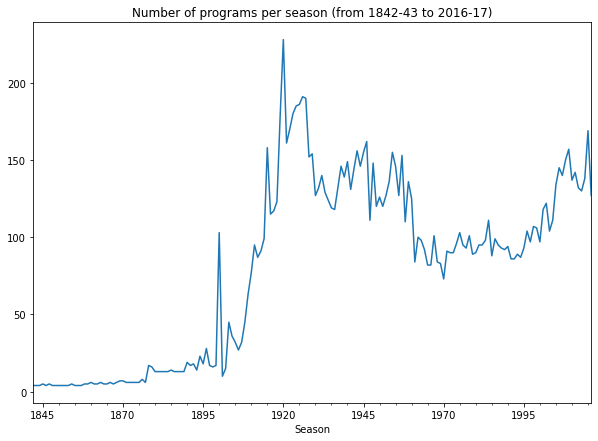

In [13]:
programs['Season'] = pd.to_datetime(programs['Season'].str[:4])

(programs.groupby('Season')
         .size()
         .plot(legend=False, use_index=True, figsize=(10, 7),
               title='Number of programs per season (from 1842-43 to 2016-17)'));

The NYP appears to be investing in increasing the number of distinct programs per season since '95. 

## 2.2 How many concerts are there per season?

What about the number of concerts? The first thing we need to do is to import the `concerts.csv` data.

In [14]:
concerts = pd.read_csv('./data/concerts.csv')
concerts.head()

,GUID,ProgramID,ConcertID,EventType,Location,Venue,Date,Time
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00+00:00,8:00PM
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-02-18T05:00:00+00:00,8:00PM
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,0,Special,"Manhattan, NY",Apollo Rooms,1843-04-07T05:00:00+00:00,8:00PM
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-04-22T05:00:00+00:00,8:00PM
4,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-11-18T05:00:00+00:00,NaN


We will use the Leon Levy Digital Archives ID (`GUID`) to identify each program.

Now, we have information regarding all the concerts that took place and the season for each program.

The problem? Information about the concert and the season are in different tables, and the program is the glue between the two. Familiar?

### Merge

Pandas provides high-performance join operations, very similar to SQL.

The method `df.merge()` method provides an interface for all database-like join methods.

In [15]:
?pd.merge

We can call `pd.merge` to join both tables on the `GUID` (and the `ProgramID`, that provides similar info).

In [16]:
# Since GUID and ProgramID offer similar info, we will drop the later.
programs = programs.drop(columns='ProgramID')

df = pd.merge(programs, concerts, on='GUID')
df.head()

,GUID,Orchestra,Season,ProgramID,ConcertID,EventType,Location,Venue,Date,Time
0,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889,0,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-13T04:00:00+00:00,7:30PM
1,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889,1,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-14T04:00:00+00:00,7:30PM
2,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889,2,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-15T04:00:00+00:00,7:30PM
3,ff89e300-b0f2-40cd-b1ab-4b43f02047d3,New York Philharmonic,2016-01-01,13890,0,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-16T04:00:00+00:00,8:00PM
4,2b5083e6-806e-47dc-81ce-00086f2b4377,New York Philharmonic,2016-01-01,14068,0,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-17T04:00:00+00:00,8:00PM


Or, alternatively, we can call `merge()` directly on the dataframe.

In [17]:
df_ = programs.merge(concerts, on='GUID')
df_.head()

,GUID,Orchestra,Season,ProgramID,ConcertID,EventType,Location,Venue,Date,Time
0,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889,0,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-13T04:00:00+00:00,7:30PM
1,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889,1,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-14T04:00:00+00:00,7:30PM
2,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889,2,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-15T04:00:00+00:00,7:30PM
3,ff89e300-b0f2-40cd-b1ab-4b43f02047d3,New York Philharmonic,2016-01-01,13890,0,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-16T04:00:00+00:00,8:00PM
4,2b5083e6-806e-47dc-81ce-00086f2b4377,New York Philharmonic,2016-01-01,14068,0,Non-Subscription,"Manhattan, NY",David Geffen Hall,2016-09-17T04:00:00+00:00,8:00PM


The critical parameter here is the `how`. Since we are not explicitly using it, the merge default to `inner` (for inner-join) by default.

But, in fact, you can use any join, just like you did in SQL: `left`, `right`, `outer` and `inner`.

Remember?

![](../media/types_of_joins.jpg)

*Fig. 1 - Types of joins in SQL, note how left, right, outer and inner translate directly to Pandas.*

A refresher on different types of joins, all supported by Pandas:

| Pandas                                         | SQL              | What it does                              |
| ---------------------------------------------- | ---------------- | ----------------------------------------- |
| `pd.merge(right, left, on='key', how='left')`  | LEFT OUTER JOIN  | Use all keys from left frame only         |
| `pd.merge(right, left, on='key', how='right')` | RIGHT OUTER JOIN | Use all keys from right frame only        |
| `pd.merge(right, left, on='key', how='outer')` | FULL OUTER JOIN  | Use union of keys from both frames        |
| `pd.merge(right, left, on='key', how='inner')` | INNER JOIN       | Use intersection of keys from both frames |

In this particular case, we have:
* A one-to-many relationship (i.e., one program to many concerts)
* Since every single show in `concerts` has a match in `programs`, the type of join we use doesn't matter.

We can use the `validate` argument to automatically check whether there are unexpected duplicates in the merge keys and check their uniqueness.

In [18]:
df__ = pd.merge(programs, concerts, on='GUID', how='outer', validate="one_to_many")
assert(concerts.shape[0] == df_.shape[0] == df__.shape[0])

Back to our question, how is the number of concerts per season evolving?

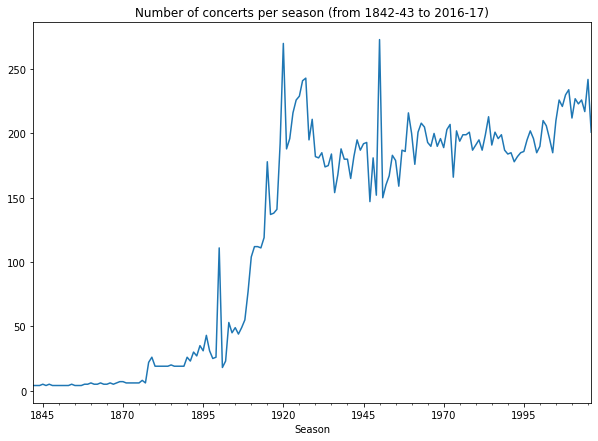

In [19]:
(programs.merge(concerts, on='GUID')
         .groupby('Season')
         .size()
         .plot(legend=False, use_index=True, figsize=(10, 7),
               title='Number of concerts per season (from 1842-43 to 2016-17)'));

Likewise, the number of concerts seems to be trending upwards since about 1995, which could be a sign of growing interest in the genre.

### Join

Now, we want the top-3 composer in total appearances.

Without surprise, we start by importing `works.csv`.

In [20]:
works = pd.read_csv('./data/works.csv',index_col='GUID')

Alternatively, we can use `df.join()` instead of `df.merge()`. 

There are, however, differences in the default behavior: for example `df.join` uses `how='left'` by default.

Let's try to perform the merge.

In [21]:
(programs.merge(works, on="GUID")
         .head(n=3))

,GUID,Orchestra,Season,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval
0,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889,5733,NaN,"Bernstein, Leonard",WEST SIDE STORY (WITH FILM),NaN,"Newman, David",NaN
1,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889,0,NaN,NaN,NaN,NaN,NaN,Intermission
2,ff89e300-b0f2-40cd-b1ab-4b43f02047d3,New York Philharmonic,2016-01-01,13890,12070,NaN,"Gershwin, George",MANHATTAN (FILM) (ARR. Pierson),NaN,"Gilbert, Alan",NaN


In [22]:
programs.merge(works, on="GUID").shape

(82576, 11)

In [23]:
(programs.join(works, on='GUID')
         .head(n=3))

# equivalent to
# pd.merge(programs, works, left_on='GUID', right_index=True,
#          how='left').head(n=3)

,GUID,Orchestra,Season,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval
0,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889.0,5733.0,NaN,"Bernstein, Leonard",WEST SIDE STORY (WITH FILM),NaN,"Newman, David",NaN
0,add7e348-110f-4db2-a1b1-ff2d977ae000,New York Philharmonic,2016-01-01,13889.0,0.0,NaN,NaN,NaN,NaN,NaN,Intermission
1,ff89e300-b0f2-40cd-b1ab-4b43f02047d3,New York Philharmonic,2016-01-01,13890.0,12070.0,NaN,"Gershwin, George",MANHATTAN (FILM) (ARR. Pierson),NaN,"Gilbert, Alan",NaN


In [24]:
programs.join(works, on="GUID").shape

(82623, 11)

We noticed that the shape of the results is diferent, we have a different number of lines in each one of the methods.
Typically, you would use `df.join()` when you want to do a left join or when you want to join on the index of the dataframe on the right.

Now for our goal: what are the top-3 composers?

In [25]:
(programs.join(works, on='GUID')
         .groupby('ComposerName')
         .size()
         .nlargest(n=3))

ComposerName
Wagner,  Richard               4923
Beethoven,  Ludwig  van        4534
Tchaikovsky,  Pyotr  Ilyich    3700
dtype: int64

Wagner wins!

What about the top-3 works?

In [26]:
(programs.join(works, on='GUID')
         .groupby(['ComposerName', 'WorkTitle'])
         .size()
         .nlargest(n=3))

ComposerName      WorkTitle                        
Wagner,  Richard  MEISTERSINGER, DIE, WWV 96           784
                  TANNHAUSER, WWV 70                   599
                  GOTTERDAMMERUNG [GÖTTERDÄMMERUNG]    592
dtype: int64

Wagner wins three times!